# Dimension Reduction


This process is part of the pilot/prototype phase of data mining and is done before deploying a model. It is presented and discussed several dimension reduction approaches:

(1) incorporating domain knowledge to remove or combine categories

(2) using data summaries to detect information overlap between variables (and remove or combine redundant 
variables or categories)

(3) using data conversion techniques such as converting categorical variables into numerical variables, and

(4) employing automated reduction techniques, such as principal components analysis (PCA), where a new set of variables (which are weighted averages of the original variables) is created.

Finally, data mining methods such as regression models and classification and regression trees are presented as a way for removing redundant variables and for combining “similar” categories of categorical variables.

# Modules

In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Example dataset: House Prices in Boston

For each neighborhood, a number of variables are given, such as the crime rate, the student/teacher ratio, and the median value of a housing unit in the neighborhood. A description of all 14 variables is given below:

    CRIM: Crime rate
    ZN: Percentage of residential land zoned for lots over 25,000 ft 2
    INDUS: Percentage of land occupied by nonretail business
    CHAS: Does tract bound Charles River? (= 1 if tract bounds river, = 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling 
    AGE: Percentage of owner-occupied units built prior to 1940 
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per \\$10,000
    PTRATIO: Pupil-to-teacher ratio by town
    LSTAT: Percentage of lower status of the population 
    MEDV: Median value of owner-occupied homes in \\$1000s
    CAT.MEDV: Is median value of owner-occupied homes in tract above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0)?

In [2]:
boston_housing_df = pd.read_csv("../datasets/BostonHousing.csv")
boston_housing_df = boston_housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
boston_housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


## Summary Statistics

The first row represents the first neighborhood, which had an average per capita crime rate of 0.006, 18% of the residential land zoned for lots over 25,000 ft 2 , 2.31% of the land devoted to nonretail business, no border on the Charles River, and so on.

The following table shows summary statistics for the Boston Housing example. We immediately see that the different variables have very different ranges of values. We will soon see how variation in scale across variables can distort analyses if not treated properly. Another observation that can be made is that the mean of the first variable, CRIM (as well as several others), is much larger than the median, indicating right skew. None of the variables have missing values. There also do not appear to be indications of extreme values that might result from typing errors.

In [3]:
boston_housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [4]:
# compute mean, standard deviation, min, max, median, lenght, and missing values of CRIM
print("CRIM var")
print("Number of missing values: ", boston_housing_df.CRIM.isnull().sum())
print("Mean    : ", boston_housing_df.CRIM.mean())
print("Std. dev: ", boston_housing_df.CRIM.std())
print("Min     : ", boston_housing_df.CRIM.min())
print("Max     : ", boston_housing_df.CRIM.max())
print("Median  : ", boston_housing_df.CRIM.median())
print("Length  : ", len(boston_housing_df.CRIM))

# compute mean, standard dev., min, max, median, length, and missing values for all variables
pd.DataFrame({"mean": boston_housing_df.mean(),
              "std": boston_housing_df.std(),
              "min": boston_housing_df.min(),
              "max": boston_housing_df.max(),
              "median": boston_housing_df.median(),
              "length": len(boston_housing_df),
              "miss.val": boston_housing_df.isnull().sum(),
             })

CRIM var
Number of missing values:  0
Mean    :  3.613523557312254
Std. dev:  8.60154510533249
Min     :  0.00632
Max     :  88.9762
Median  :  0.25651
Length  :  506


,mean,std,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


Next, we summarize relationships between two or more variables. For numerical variables, we can compute a complete matrix of correlations between each pair of variables, using the pandas method corr(). The following table shows the correlation matrix for the Boston Housing variables. We see that most correlations are low and that many are negative.

In [5]:
boston_housing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


## Aggregation and Pivot Tables

Another very useful approach for exploring the data is aggregation by one or more variables. For aggregation by a single variable, we can use the pandas method value_counts(). The following table shows the number of neighborhoods that bound the Charles River vs. those that do not (the variable CHAS is chosen as the grouping variable). It appears that the majority of neighborhoods (471 of 506) do not bound the river.

In [6]:
boston_housing_df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

The groupby() method can be used for aggregating by one or more variables, and computing a range of summary statistics (count, mean, median, etc.). For categorical variables, we obtain a breakdown of the records by the combination of categories. The next table shows the result of computing the average MEDV by CHAS and RM. Note that the numerical variable RM (the average number of rooms per dwelling in the neighborhood) should be first grouped into bins of size 1 (0–1, 1–2, etc.). Note the empty values, denoting that there are no neighborhoods in the dataset with those combinations (e.g., bounding the river and having on average 3 rooms).

In [7]:
# create bins of size 1 for variable using the method pd.cut. By default, the method creates
# a categorical variable, e.g. (6, 7]. The argument labels=False determines integers instead,
# e.g. 6.
boston_housing_df["RM_bin"] = pd.cut(boston_housing_df.RM, range(0, 10), labels=False)

# compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the
# groupby method, then restrict the analysis to MEDV and determine the mean for each group.
boston_housing_df.groupby(["RM_bin", "CHAS"])["MEDV"].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

Another useful method is pivot_table() in the pandas package, that allows the creation of pivot tables by reshaping the data by the aggregating variables of our choice. The following table computes the average of MEDV by CHAS and RM and presents it as a pivot table.

In [8]:
# use pivot_table() to reshape data and generate pivot table
pd.pivot_table(boston_housing_df, values="MEDV", index=["RM_bin"], columns=["CHAS"],
               aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In classification tasks, where the goal is to find predictor variables that distinguish between two classes,
a good exploratory step is to produce summaries for each class. This can assist in detecting useful predictors that display some separation between the two classes. Data summaries are useful for almost any data mining task and are therefore an important preliminary step for cleaning and understanding the data before carrying out further analyses.

# Correlation Analysis

In datasets with a large number of variables (which are likely to serve as predictors), there is usually much overlap in the information covered by the set of variables. One simple way to find redundancies is to look at a correlation matrix. This shows all the pairwise correlations between variables. Pairs that have a very strong (positive or negative) correlation contain a lot of overlap in information and are good candidates for data reduction by removing one of the variables. Removing variables that are strongly correlated to others is useful for avoiding multicollinearity problems that can arise in various models. 

(Multicollinearity is the presence of two or more predictors sharing the same linear relationship with the outcome variable.)

<ipython-input-9-d4fec39ff54e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.0%}".format(x) for x in ax.get_yticks()])


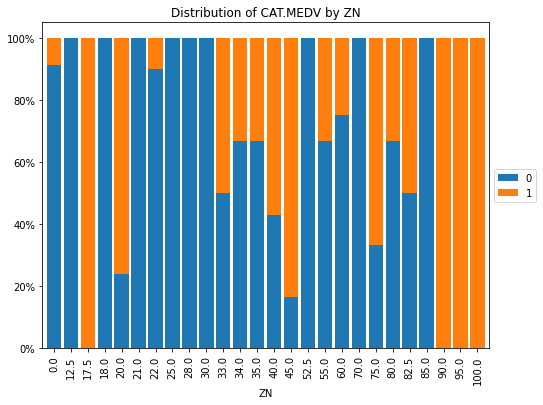

In [9]:
# use method crosstab to create a cross-tabulation of two variable
tbl = pd.crosstab(boston_housing_df.CAT_MEDV, boston_housing_df.ZN)

# convert numbers to ratios
prop_tbl = tbl / tbl.sum()
prop_tbl.round(2)

# plot the rations in a stacked bar chart
ax = prop_tbl.transpose().plot(kind="bar", stacked=True, figsize=(8, 6), width=0.85)
ax.set_yticklabels(["{:.0%}".format(x) for x in ax.get_yticks()])
plt.title("Distribution of CAT.MEDV by ZN")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Reducing the Number of Categories in Categorical Variables

When a categorical variable has many categories, and this variable is destined to be a predictor, many data mining methods will require converting it into many dummy variables. In particular, a variable with m categories will be transformed into either m or m − 1 dummy variables (depending on the method). This means that even if we have very few original categorical variables, they can greatly inflate the dimension of the dataset. One way to handle this is to reduce the number of categories by combining close or similar categories. Combining categories requires incorporating expert knowledge and common sense.

Generally, categories that contain very few observations are good candidates for combining with other categories. Use only the categories that are most relevant to the analysis and label the rest as “other".

An example is shown in the above figure, where the distribution of outcome variable CAT.MEDV is broken down by ZN (treated here as a categorical variable). We can see that the distribution of CAT.MEDV is identical for ZN = 17.5, 90, 95, and 100 (where all neighborhoods have CAT.MEDV = 1). These four categories can then be combined into a single category. Similarly, categories ZN where all neighborhoods have CAT.MEDV = 0 can be combined. Further combination is also possible based on similar bars.

In a time series context where we might have a categorical variable denoting season (such as month, or hour of day) that will serve as a predictor, reducing categories can be done by examining the time series plot and identifying similar periods. For example, the time plot in the next figure shows the quarterly revenues of Toys “R” Us between 1992 and 1995. Only quarter 4 periods appear different, and therefore, we can combine quarters 1–3 into a single category.

In [10]:
toys_df = pd.read_csv("../datasets/ToysRUsRevenues.csv")
toys_df.head()

,Index,QuarterYear,Revenue(in million $),Quarter
0,1,Q1-92,1026,Q1
1,2,Q2-92,1056,Q2
2,3,Q3-92,1182,Q3
3,4,Q4-92,2861,Q4
4,5,Q1-93,1172,Q1


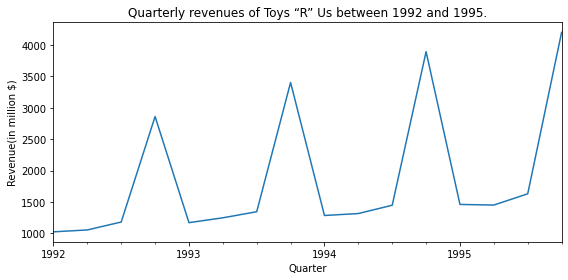

In [11]:
quarters = toys_df.QuarterYear.str.replace(r"(Q\d)-([0-9]+)", r"19\2\1", regex=True)
toys_df["Date"] = pd.PeriodIndex(quarters, freq="Q")
toys_ts = pd.Series(toys_df["Revenue(in million $)"].values, index=toys_df.Date)

fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)
toys_ts.plot(ax=ax, legend=False)

ax.set_ylabel("Revenue(in million $)")
ax.set_xlabel("Quarter")
ax.set_title("Quarterly revenues of Toys “R” Us between 1992 and 1995.")
plt.show()

# Converting a Categorical Variable to a Numerical Variable

Sometimes the categories in a categorical variable represent intervals. Common examples are age group or income bracket. If the interval values are known (e.g., category 2 is the age interval 20–30), we can replace the categorical value (“2” in the example) with the mid-interval value (here “25”). The result will be a numerical variable which no longer requires multiple dummy variables.

# Principal Components Analysis

Principal components analysis (PCA) is a useful method for dimension reduction, especially when the number of variables is large. PCA is especially valuable when we have subsets of measurements that are measured on the same scale and are highly correlated. In that case, it provides a few variables (often as few as three) that are weighted linear combinations of the original variables, and that retain the majority of the information of the full original set. PCA is intended for use with numerical variables. For categorical variables, other methods such as correspondence analysis are more suitable.

# Example dataset: Breakfast Cereals

Data were collected on the nutritional information and consumer rating of 77 breakfast cereals. 1 The consumer rating is a rating of cereal “healthiness” for consumer information (not a rating by consumers). For each cereal, the data include 13 numerical variables, and we are interested in reducing this dimension. For each cereal, the information is based on a bowl of cereal rather than a serving size, because most people simply fill a cereal bowl (resulting in constant volume, but not weight). A snapshot of these data is given below:

In [12]:
cereals_df = pd.read_csv("../datasets/Cereals.csv")
cereals_df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253


The description of the different variables is given next:

    mfr: Manufacturer of cereal (American Home Food Products, General Mills, Kellogg, etc.)
    type: Cold or hot
    calories: Calories per serving
    protein: Grams of protein
    fat: Grams of fat
    sodium: Milligrams of sodium
    fiber: Grams of dietary fiber
    carbo: Grams of complex carbohydrates
    sugars: Grams of sugars
    potass: Milligrams of potassium
    vitamins: Vitamins and minerals: 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: Display shelf (1, 2, or 3, counting from the floor)
    weight: Weight in ounces of one serving
    cups: Number of cups in one serving
    rating: Rating of the cereal calculated by consumer reports

Let's focus first on two variables: calories and consumer rating

In [13]:
cereals_df[["calories", "rating"]]

,calories,rating
0,70,68.402973
1,120,33.983679
2,70,59.425505
3,50,93.704912
4,110,34.384843
...,...,...
72,110,39.106174
73,110,27.753301
74,100,49.787445
75,100,51.592193


The average calories across the 77 cereals is 106.88 and the average consumer rating is 42.67:

In [14]:
cereals_df[["calories", "rating"]].mean().round(2)

calories    106.88
rating       42.67
dtype: float64

The estimated covariance matrix between the two variables is:

In [15]:
cereals_df[["calories", "rating"]].cov().round(2)

,calories,rating
calories,379.63,-188.68
rating,-188.68,197.33


It can be seen that the two variables are strongly correlated with a negative correlation of:

>corr = - 188.68 / srqt(379.63 * 197.32) = -0.69

In [16]:
cereals_df[["calories", "rating"]].corr().round(2)

,calories,rating
calories,1.00,-0.69
rating,-0.69,1.00


Roughly speaking, 69% of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? Since there is redundancy in the information that the two variables contain, it might be possible to reduce the two variables to a single variable without losing too much information. The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.

Information here is in the sense of variability: What can explain the most variability among the 77 cereals? The total variability here is the sum of the variances of the two variables, which in this case is:

> 379.63 + 197.32 = 577

This means that calories accounts for 66% = 379.63 / 577 of the total variability, and rating for the remaining 34%. If we drop one of the variables for the sake of dimension reduction, we lose at least 34% of the total variability. Can we redistribute the total variability between two new variables in a more polarized way? If so, it might be possible to keep only the one new variable that (hopefully) accounts for a large portion of the total variation.

The following figure shows a scatter plot of rating vs. calories. The line $z_1$ is the direction in which the variability of the points is largest. It is the line that captures the most variation in the data if we decide to reduce the dimensionality of the data from two to one. Among all possible lines, it is the line for which, if we
project the points in the dataset orthogonally to get a set of 77 (one-dimensional) values, the variance of the $z_1$ values will be maximum. This is called the *first principal component*. It is also the line that minimizes the sum-of-squared perpendicular distances from the line. The $z_2$-axis is chosen to be perpendicular to the $z_1$-axis. In the case of two variables, there is only one line that is perpendicular to $z_1$, and it has the second largest variability, but its information is uncorrelated with $z_1$ . This is called the *second principal component*. In general, when we have more than two variables, once we find the direction $z_1$ with the largest variability, we search among all the orthogonal directions to $z_1$ for the one with the next-highest variability. That is $z_2$. The idea is then to find the coordinates of these lines and to see how they redistribute the variability.

Running PCA in scikit-learn is done with the class `sklearn.decomposition.PCA`. Following is the output from running PCA on the two variables calories and rating. The value `components_` of this function is the rotation matrix, which gives the weights that are used to project the original points onto the two new directions. The weights for $z_1$ are given by (−0.847, 0.532), and for $z_2$ they are given by (0.532, 0.847). The summary gives the reallocated variance: $z_1$ accounts for 86% of the total variability and $z_2$ for the remaining 14%. Therefore, if we drop $z_2$ , we still maintain 86% of the total variability.

In [17]:
pcs = PCA(n_components=2)
pcs.fit(cereals_df[["calories", "rating"]])
pcs_summary = pd.DataFrame({"Std. dev": np.sqrt(pcs.explained_variance_),
                            "Proportion of variance": pcs.explained_variance_ratio_,
                            "Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_),
                            "Explained variance": pcs.explained_variance_})
pcs_summary = pcs_summary.transpose()
pcs_summary.columns = ["PC1", "PC2"]
pcs_summary.round(4)

pcs_components_df = pd.DataFrame(pcs.components_.transpose(),
                                 columns=["PC1", "PC2"],
                                 index=["calories", "rating"])

scores = pd.DataFrame(pcs.transform(cereals_df[["calories", "rating"]]),
                      columns=["PC1", "PC2"])

In [18]:
pcs_summary

,PC1,PC2
Std. dev,22.316462,8.884410
Proportion of variance,0.863191,0.136809
Cumulative proportion,0.863191,1.000000
Explained variance,498.024478,78.932739


In [19]:
pcs_components_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [20]:
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


Text(0, 0.5, 'Rating')

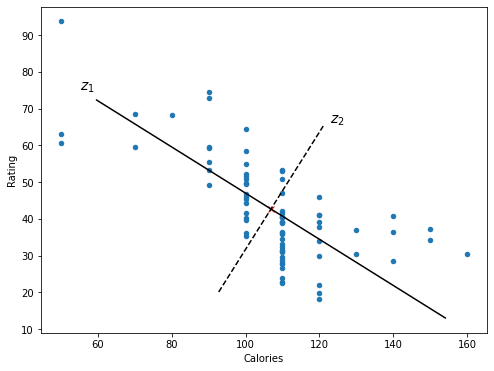

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))


cereals_df[["calories", "rating"]].plot(kind="scatter", x="calories", y="rating", ax=ax)

# new origin
plt.plot(pcs.mean_[0], pcs.mean_[1], marker="x", c="r")

# the principal component centers a (x, y) around the mean for the new basis on the origin
# of the form pca.mean_ + np.sqrt(pca.explained_variance_) * pca.components_
# sucha that the projection of the (x, y) will be:
# (x - pcs.mean_[0]) + pcs_summary.PCn["Std. dev"] * pcs_components_df.PCn.calories +
# (y - pcs.mean_[1]) + pcs_summary.PCn["Std. dev"] * pcs_components_df.PCn.rating = projection

# first principal component 
plt.plot([pcs.mean_[0] + - 2.5 * pcs_summary.PC1["Std. dev"] * pcs_components_df.PC1.calories,
          pcs.mean_[0] + 2.5 * pcs_summary.PC1["Std. dev"] * pcs_components_df.PC1.calories],
         [pcs.mean_[1] + - 2.5 * pcs_summary.PC1["Std. dev"] * pcs_components_df.PC1.rating,
          pcs.mean_[1] + 2.5 * pcs_summary.PC1["Std. dev"] * pcs_components_df.PC1.rating],
        c="k")

# second principal component
plt.plot([pcs.mean_[0] + - 3 * pcs_summary.PC2["Std. dev"] * pcs_components_df.PC2.calories,
          pcs.mean_[0] + 3 * pcs_summary.PC2["Std. dev"] * pcs_components_df.PC2.calories],
         [pcs.mean_[1] + - 3 * pcs_summary.PC2["Std. dev"] * pcs_components_df.PC2.rating,
          pcs.mean_[1] + 3 * pcs_summary.PC2["Std. dev"] * pcs_components_df.PC2.rating],
         "k--")

plt.text(55, 75, "$z_1$", size=14)
plt.text(123, 66, "$z_2$", size=14)
plt.xlabel("Calories")
plt.ylabel("Rating")

The weights are used to compute principal component scores, which are the projected values of calories and rating onto the new axes (after subtracting the means). The transform method of the `PCS` object can be used to determine the score from the original data. The first column is the projection onto $z_1$ using the weights (0.847, −0.532). 

The second column is the projection onto $z_2$ using the weights (0.532, 0.847). For example, the first score for the 100% Bran cereal (with 70 calories and a rating of 68.4) is

> (−0.847)(70 − 106.88) + (0.532)(68.4 − 42.67) = 44.92

Note that the means of the new variables $z_1$ and $z_2$ are zero, because we’ve subtracted the mean of each variable. The sum of the variances var(z 1 ) + var(z 2 ) is equal to the sum of the variances of the original variables, var(calories) + var(rating). Furthermore, the variances of $z_1$ and $z_2$ are 498 and 79, respectively, so the first principal component, $z_1$, accounts for 86% of the total variance. Since it captures most of the variability in the data, it seems reasonable to use one variable, the first principal score, to represent the two variables in the original data. Next, we generalize these ideas to more than two variables.

## Principal Components

Denote the original $p$ variables by $X_1$ , $X_2$, $…$, $X_p$. In PCA, we are looking for a set of new variables $Z_1$, $Z_2$, $...$, $Z_p$ that are weighted averages of the original variables (after subtracting their mean):

> $Z_i = a_{i,1}(X_1 - \bar{X}_1) + a_{2,1}(X_2 - \bar{X}_2) + ... + a_{i,p}(X_p - \bar{X}_p)$

> $i = 1, ..., p$

where each pair of $Z$’s has correlation = 0. We then order the resulting $Z$’s by their variance, with $Z_1$, having the largest variance and $Z_p$ having the smallest variance. The software computes the weights $a_{i, j}$, which are then used in computing the principal component scores.

A further advantage of the principal components compared to the original data is that they are uncorrelated (correlation coefficient = 0). If we construct regression models using these principal components as predictors, we will not encounter problems of multicollinearity.

Let us return to the breakfast cereal dataset with all 15 variables, and apply PCA to the 13 numerical variables. The resulting output is shown below. Note that the first three components account for more than 96% of the total variation associated with all 13 of the original variables. This suggests that we can capture most of the variability in the data with less than 25% of the original dimensions in the data. In fact, the first two principal components alone capture 92.6% of the total variation. However, these results are influenced by the scales of the variables, as we describe next.

In [22]:
pcs = PCA()
# Use method dropna(axis=0) to remove observations that contain missing values
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))

pcs_summary_df = pd.DataFrame({"Standard deviation": np.sqrt(pcs.explained_variance_),
                               "Proportion of variance": pcs.explained_variance_ratio_,
                               "Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
# use of the transpose() method to get the scores
pcs_summary_df = pcs_summary_df.transpose()
pcs_summary_df.columns = ["PC{}".format(i) for i in range(1, len(pcs_summary_df.columns) + 1)]
pcs_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [23]:
pcs_components_df = pd.DataFrame(pcs.components_.transpose(),
                                 columns=pcs_summary_df.columns,
                                 index=cereals_df.iloc[:, 3:].columns)
pcs_components_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,0.000757,0.008801,0.001026,0.003200,0.056176
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876


## Normalizing the Data

A further use of PCA is to understand the structure of the data. This is done by examining the weights to see how the original variables contribute to the different principal components. In our example, it is clear that the first principal component is dominated by the sodium content of the cereal: it has the highest (in this case, positive) weight. This means that the first principal component is in fact measuring how much sodium is in the cereal. Similarly, the second principal component seems to be measuring the amount of potassium. Since both these variables are measured in milligrams, whereas the other nutrients are measured in grams, the scale is obviously leading to this result.

The variances of potassium and sodium are much larger than the variances of the other variables, and thus the total variance is dominated by these two variances. A solution is to normalize the data before performing the PCA. Normalization (or standardization) means replacing each original variable by a standardized version of the variable that has unit variance. This is easily accomplished by dividing each variable by its standard deviation. The effect of this normalization is to give all variables equal importance in terms of variability.

When should we normalize the data like this? It depends on the nature of the data. When the units of measurement are common for the variables (e.g., dollars), and when their scale reflects their importance (sales of jet fuel, sales of heating oil), it is probably best not to normalize (i.e., not to rescale the data so that they have unit variance). If the variables are measured in different units so that it is unclear how to compare the variability of different variables (e.g., dollars for some, parts per million for others) or if for variables measured in the same units, scale does not reflect importance (earnings per share, gross revenues), it is generally advisable to normalize. In this way, the differences in units of measurement do not affect the principal components’ weights. In the rare situations where we can give relative weights to variables, we multiply the normalized variables by these weights before doing the PCA.

An alternative to normalizing and then performing PCA is to perform PCA on the correlation matrix instead of the
covariance matrix.

In [24]:
pcs = PCA()
# Use method dropna(axis=0) to remove observations that contain missing values
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))

pcs_summary_df = pd.DataFrame({"Standard deviation": np.sqrt(pcs.explained_variance_),
                               "Proportion of variance": pcs.explained_variance_ratio_,
                               "Cumulative proportion": np.cumsum(pcs.explained_variance_ratio_)})
# use of the transpose() method to get the scores
pcs_summary_df = pcs_summary_df.transpose()
pcs_summary_df.columns = ["PC{}".format(i) for i in range(1, len(pcs_summary_df.columns) + 1)]
pcs_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [25]:
pcs_components_df = pd.DataFrame(pcs.components_.transpose(),
                                 columns=pcs_summary_df.columns,
                                 index=cereals_df.iloc[:, 3:].columns)
pcs_components_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


Now we find that we need seven principal components to account for more than 90% of the total variability. The first two principal components account for only 52% of the total variability, and thus reducing the number of variables to two would mean losing a lot of information. Examining the weights, we see that the first principal component measures the balance between two quantities:

(1) calories and cups (large negative weights) vs. (2) protein, fiber, potassium, and consumer rating (large positive weights).

High scores on principal component 1 mean that the cereal is low in calories and the amount per bowl, and high in protein, and potassium. Unsurprisingly, this type of cereal is associated with a high consumer rating. The second principal component is most affected by the weight of a serving, and the third principal component by the carbohydrate content. We can continue labeling the next principal components in a similar fashion to learn about the structure of the data.

When the data can be reduced to two dimensions, a useful plot is a scatter plot of the first vs. second principal scores with labels for the observations (if the dataset is not too large). The following figure illustrate this, it displays the first two principal component scores for the breakfast cereals.

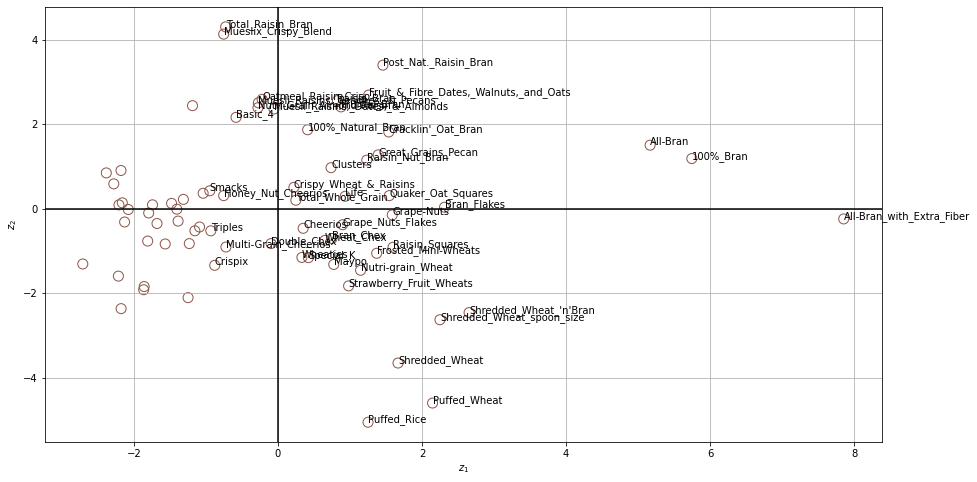

In [26]:
names = cereals_df.dropna(axis=0).reset_index(drop=True)["name"]

scores = pd.DataFrame(pcs.transform(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0))))
scores.columns = ["PC{}".format(i) for i in range(1, len(pcs_summary_df.columns) + 1)]

fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(x=scores.PC1, y=-scores.PC2,
            color="C5", facecolor="None", s=100)

for i, txt in enumerate(names):
    if scores.PC1[i] < -1:
        continue
    if scores.PC1[i] < -1 and scores.PC2[i] < -2:
        continue
    ax.annotate(txt, (scores.PC1[i], -scores.PC2[i]))
    
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.show()

We can see that as we move from right (bran cereals) to left, the cereals are less “healthy” in the sense of high calories, low protein and fiber, and so on. Also, moving from bottom to top, we get heavier cereals (moving from puffed rice to raisin bran). These plots are especially useful if interesting clusters of observations can be found. For instance, we see here that children’s cereals are close together on the middle-left part of the plot.